In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from prettytable import PrettyTable
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_squared_error, mean_squared_error, mean_squared_log_error
from sklearn.linear_model import Lasso, ElasticNet, Ridge, SGDRegressor
from sklearn.svm import SVR, NuSVR
from sklearn.ensemble import BaggingRegressor, RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LinearRegression
import random
random.seed(100)
from sklearn.metrics import mean_absolute_error

In [5]:
class Dataloader():
    """Bike sharing dataset loader"""
    
    def __init__(self, csv_path):
        '''Initializer bike sharing dataset
        Arguments: - csv_path{str} '''
        
        self.csv_path = csv_path
        self.data = pd.read_csv(self.csv_path, error_bad_lines=False)
        
        self.data.sample(frac=1.0, replace=True, random_state=1)
        
    def getHeader(self):
        return list(self.data.columns.values)
    
    def getData(self):
        split_train = int(60 /100* len(self.data))
        split_val = int(80/100 * len(self.data))
        train = self.data[:split_train]
        val = self.data[split_train:split_val]
        test = self.data[split_val:]
        return train, val, test
    
    def getFullData(self):
        return self.data

In [9]:
dataloader = Dataloader('https://raw.githubusercontent.com/firmai/python-business-analytics/master/data/bike/hour.csv')
train, val, test = dataloader.getData()
fullData = dataloader.getFullData()

category_features = ['season', 'holiday', 'mnth', 'hr', 'weekday', 'workingday', 'weathersit']
number_features = ['temp', 'atemp', 'hum', 'windspeed']

features= category_features + number_features
target = ['cnt']

In [10]:
fullData.head(2)

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40


In [11]:
for col in category_features:
    fullData[col] = fullData[col].astype('category')
print(fullData[category_features].describe())

        season  holiday   mnth     hr  weekday  workingday  weathersit
count    17379    17379  17379  17379    17379       17379       17379
unique       4        2     12     24        7           2           4
top          3        0      5     17        6           1           1
freq      4496    16879   1488    730     2512       11865       11413


In [12]:
fullData.isnull().any()

instant       False
dteday        False
season        False
yr            False
mnth          False
hr            False
holiday       False
weekday       False
workingday    False
weathersit    False
temp          False
atemp         False
hum           False
windspeed     False
casual        False
registered    False
cnt           False
dtype: bool

[Text(0, 0.5, 'Count'),
 Text(0.5, 0, 'Temperature'),
 Text(0.5, 1.0, 'Box Plot On Count Across Temperature')]

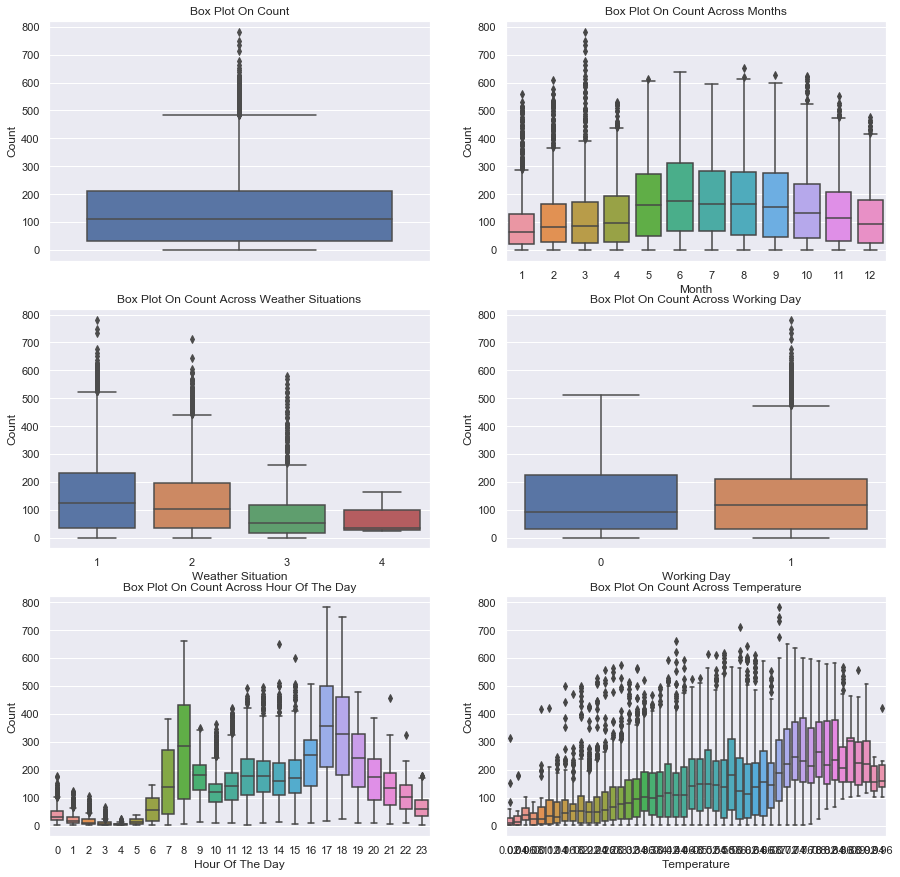

In [13]:
sns.set(font_scale=1.0)
fig, axes = plt.subplots(nrows=3, ncols=2)
fig.set_size_inches(15,15)
sns.boxplot(data=train, y='cnt', orient='v', ax=axes[0][0])
sns.boxplot(data=train,y="cnt",x="mnth",orient="v",ax=axes[0][1])
sns.boxplot(data=train,y="cnt",x="weathersit",orient="v",ax=axes[1][0])
sns.boxplot(data=train,y="cnt",x="workingday",orient="v",ax=axes[1][1])
sns.boxplot(data=train,y="cnt",x="hr",orient="v",ax=axes[2][0])
sns.boxplot(data=train,y="cnt",x="temp",orient="v",ax=axes[2][1])

axes[0][0].set(ylabel='Count',title="Box Plot On Count")
axes[0][1].set(xlabel='Month', ylabel='Count',title="Box Plot On Count Across Months")
axes[1][0].set(xlabel='Weather Situation', ylabel='Count',title="Box Plot On Count Across Weather Situations")
axes[1][1].set(xlabel='Working Day', ylabel='Count',title="Box Plot On Count Across Working Day")
axes[2][0].set(xlabel='Hour Of The Day', ylabel='Count',title="Box Plot On Count Across Hour Of The Day")
axes[2][1].set(xlabel='Temperature', ylabel='Count',title="Box Plot On Count Across Temperature")

c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, n

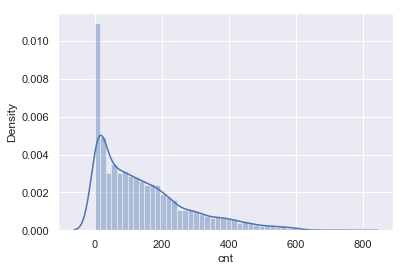

In [17]:
sns.distplot(train[target[-1]])

Samples in train set with outliers: 10427
Samples in train set without outliers: 10151


c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\matplotlib\cbook\__init__.py:1377: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
c:\users\ankit.dubey\appdata\local\programs\python\python37\lib\site-packages\matplotlib\axes\_base.py:237: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, n

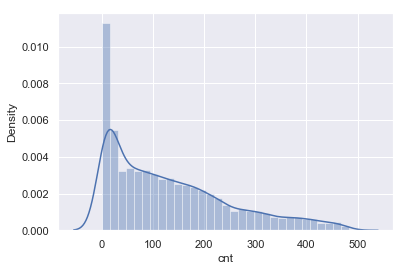

In [19]:
print('Samples in train set with outliers: {}'.format(len(train)))
q1 = train.cnt.quantile(0.25)
q3 = train.cnt.quantile(0.75)
iqr = q3 - q1
lower_bound = q1 - (1.5*iqr)
upper_bound = q3 + (1.5*iqr)
train_preprocessed = train.loc[(train.cnt >= lower_bound) & (train.cnt <= upper_bound)]
print('Samples in train set without outliers: {}'.format(len(train_preprocessed)))
sns.distplot(train_preprocessed.cnt)

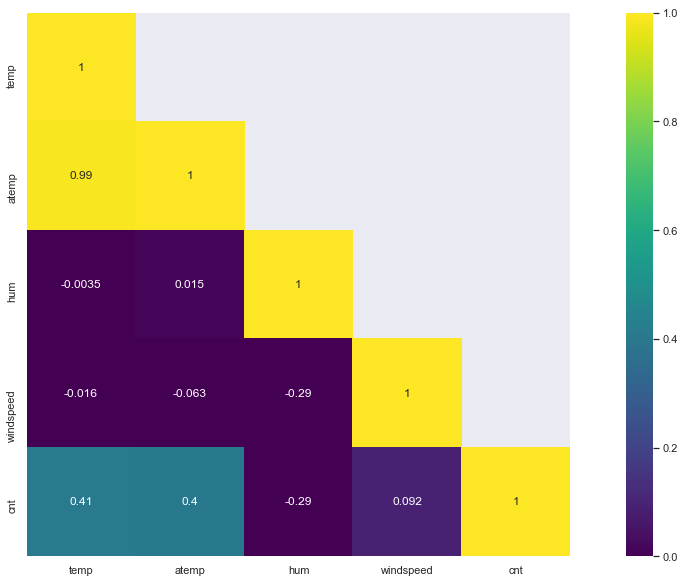

In [21]:
matrix = train[number_features + target].corr()
heat = np.array(matrix)
heat[np.tril_indices_from(heat)] = False
fig, ax = plt.subplots()
fig.set_size_inches(20,10)
sns.set(font_scale=1.0)
sns.heatmap(matrix, mask=heat, vmax=1.0, vmin=0.0, square=True, annot=True, cmap='viridis')

In [22]:
features.remove('atemp')

In [23]:
x_train = train_preprocessed[features].values
y_train = train_preprocessed[target].values.ravel()
val = val.sort_values(by=target)
x_val = val[features].values
y_val = val[target].values.ravel()
x_test = test[features].values

table = PrettyTable()
table.field_names = ['Model', 'Mean Squared Error', 'R2 score']

models = [
    SGDRegressor(max_iter=1000, tol=1e-3),
    Lasso(alpha=0.1),
    ElasticNet(random_state=0),
    Ridge(alpha=0.5),
    SVR(gamma='auto', kernel='linear'),
    SVR(gamma='auto', kernel='rbf'),
    BaggingRegressor(),
    BaggingRegressor(KNeighborsClassifier(), max_samples=0.5, max_features=0.5),
    NuSVR(gamma='auto'),
    RandomForestRegressor(random_state=0, n_estimators=300)
]


for model in models:
    model.fit(x_train, y_train)
    y_res = model.predict(x_val)
    
    mse = mean_squared_error(y_val, y_res)
    score = model.score(x_val, y_val)
    
    table.add_row([type(model).__name__, format(mse, '.2f'), format(score, '.2f')])
    
print(table)

+-----------------------+--------------------+----------+
|         Model         | Mean Squared Error | R2 score |
+-----------------------+--------------------+----------+
|      SGDRegressor     |      46718.63      |  -0.01   |
|         Lasso         |      43103.36      |   0.07   |
|       ElasticNet      |      54155.92      |  -0.17   |
|         Ridge         |      42963.88      |   0.07   |
|          SVR          |      50794.62      |  -0.09   |
|          SVR          |      41659.68      |   0.10   |
|    BaggingRegressor   |      18980.48      |   0.59   |
|    BaggingRegressor   |      46497.40      |  -0.00   |
|         NuSVR         |      41517.67      |   0.11   |
| RandomForestRegressor |      18949.93      |   0.59   |
+-----------------------+--------------------+----------+


In [32]:
table = PrettyTable()
table.field_names = ["Model", "Dataset", "MSE", "MAE", 'RMSLE', "R² score"]
model = RandomForestRegressor(bootstrap=True, criterion='mse',
                             max_depth=None,
                    max_features='auto', max_leaf_nodes=None,
                    min_impurity_decrease=0.0,
                min_impurity_split=None,
                min_samples_leaf=1, min_samples_split=4,
                min_weight_fraction_leaf=0.0,
                n_estimators=200, n_jobs=None,
                oob_score=False, random_state=None,
                verbose=0, warm_start=False)
model.fit(x_train, y_train)

def evaluate(x, y, dataset):
    pred = model.predict(x)
    mse = mean_squared_error(y, pred)
    mae = mean_absolute_error(y, pred)
    score = model.score(x,y)
    rmsle = np.sqrt(mean_squared_log_error(y, pred))
    
    table.add_row([type(model).__name__, dataset, format(mse, '.2f'), format(mae, '.2f'),
                  format(rmsle, '.2f'), format(score, '.2f')])
 
evaluate(x_train, y_train, 'training')
evaluate(x_val, y_val, 'validation')
print(table)

+-----------------------+------------+----------+-------+-------+----------+
|         Model         |  Dataset   |   MSE    |  MAE  | RMSLE | R² score |
+-----------------------+------------+----------+-------+-------+----------+
| RandomForestRegressor |  training  |  299.57  | 10.94 |  0.21 |   0.98   |
| RandomForestRegressor | validation | 18947.80 | 96.41 |  0.47 |   0.59   |
+-----------------------+------------+----------+-------+-------+----------+


In [33]:
importances = model.feature_importances_

std = np.std([tree.feature_importances_ for tree in model.estimators_], axis=0)
indices = np.argsort(importances)[::-1]

In [34]:
print('Feature Ranking: ')

for f in range(x_val.shape[1]):
    print("%d. feature %s (%f)" % (f+1, features[indices[f]], importances[indices[f]]))

Feature Ranking: 
1. feature hr (0.633034)
2. feature temp (0.159383)
3. feature hum (0.049763)
4. feature workingday (0.047953)
5. feature weathersit (0.026877)
6. feature windspeed (0.026492)
7. feature weekday (0.020279)
8. feature mnth (0.019857)
9. feature season (0.013129)
10. feature holiday (0.003234)
